In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Cargar datos partidos
df_partidos = pd.read_csv("../partidos_cebollitas_fe82a1a4-e109-41b1-8b78-d9b4341dacaf.csv")

# Mostrar las primeras filas
df_partidos.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML


In [8]:
# Estadisticas descriptivas generales
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [10]:
# Promedio goles Cebollitas como local y visitante
goles_local_cebo = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']['goles_local'].mean()
goles_visitante_cebo = df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'].mean()

print(f"Promedio goles Cebollitas como local: {goles_local_cebo}")
print(f"Promedio goles Cebollitas como visitante: {goles_visitante_cebo}")

Promedio goles Cebollitas como local: 2.230769230769231
Promedio goles Cebollitas como visitante: 2.611111111111111


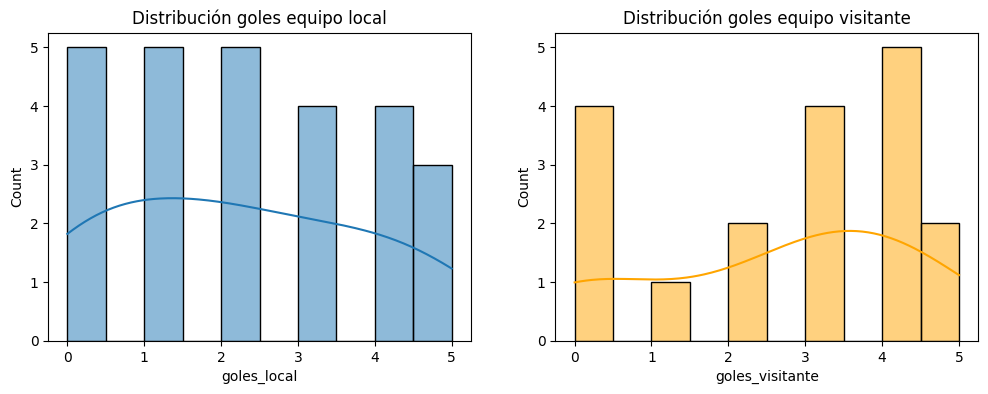

In [15]:
# Histogramas de goles marcados (local y visitante)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']['goles_local'], kde=True, ax=ax[0], bins=10)
ax[0].set_title('Distribución goles equipo local')
sns.histplot(df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Distribución goles equipo visitante')
plt.show()

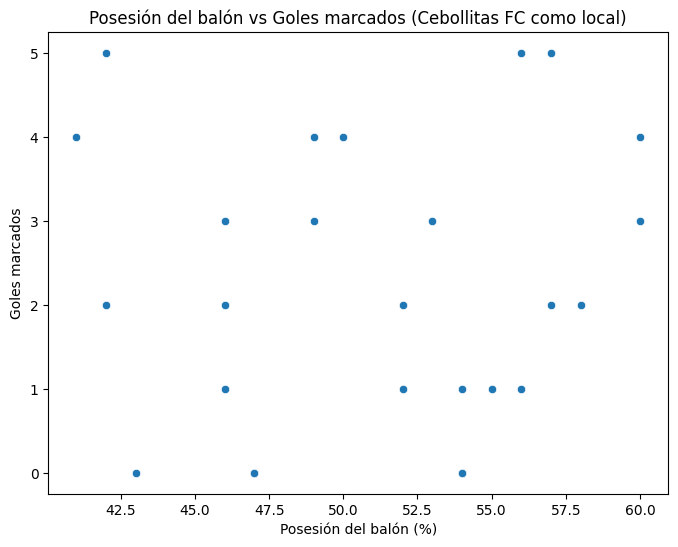

In [17]:
# Scatterplot de posesión vs goles marcados (local)
plt.figure(figsize=(8, 6))
sns.scatterplot(
	data=df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC'],
	x='posesion_local (%)',
	y='goles_local'
)
plt.title('Posesión del balón vs Goles marcados (Cebollitas FC como local)')
plt.xlabel('Posesión del balón (%)')
plt.ylabel('Goles marcados')
plt.show()

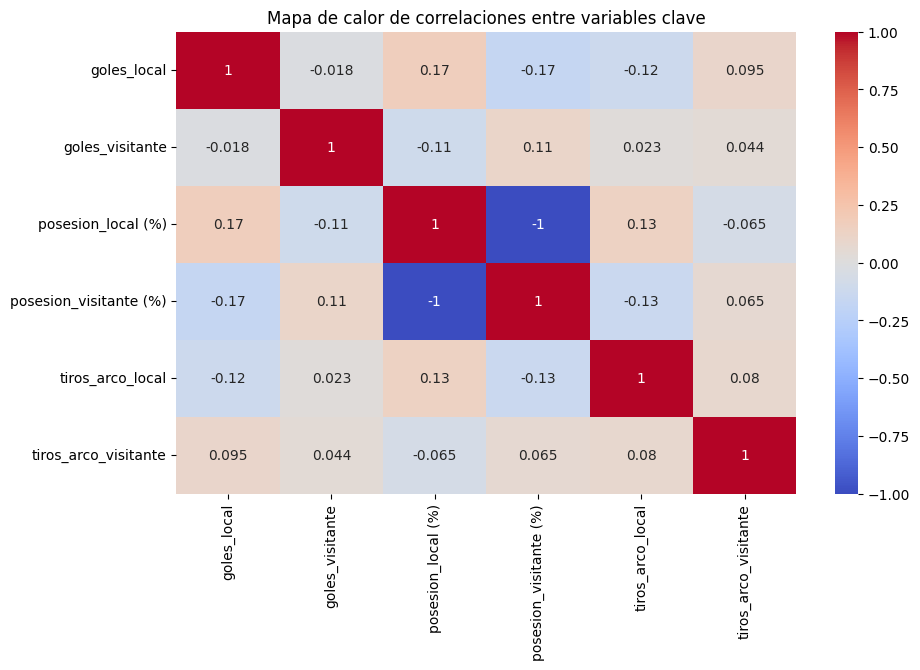

In [20]:
# Mapa de calor para correlación entre variables clave
plt.figure(figsize=(10, 6))
sns.heatmap(df_partidos[[
                        'goles_local', 'goles_visitante', 'posesion_local (%)', 
                        'posesion_visitante (%)', 'tiros_arco_local', 'tiros_arco_visitante']].corr(), 
                        annot=True, 
                        cmap='coolwarm')
plt.title('Mapa de calor de correlaciones entre variables clave')
plt.show()